## Resample Data to Different Frequencies

In this tutorial, we'll explore how to resample data using the gridstatusio API. For example. you'll see how to convert data reported every 5 minutes to an hourly format.

In [1]:
import gridstatusio
import plotly.graph_objects as go
import pandas as pd

gridstatusio.__version__

'0.5.4'

## Initialize the gridstatusio client

We set up the GridStatusClient to fetch our data.

In [2]:
client = gridstatusio.GridStatusClient()

## Fetch Data at Different Frequencies

First, let's query the raw 5 minute data to see what it looks like

In [3]:
df_5min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    tz="US/Pacific",
)

df_5min

Fetching Page 1...Done in 0.37 seconds. 

Total number of rows: 288


,interval_start_local,interval_end_local,load
0,2023-09-01 00:00:00-07:00,2023-09-01 00:05:00-07:00,27923
1,2023-09-01 00:05:00-07:00,2023-09-01 00:10:00-07:00,28025
2,2023-09-01 00:10:00-07:00,2023-09-01 00:15:00-07:00,28073
3,2023-09-01 00:15:00-07:00,2023-09-01 00:20:00-07:00,27905
4,2023-09-01 00:20:00-07:00,2023-09-01 00:25:00-07:00,27870
...,...,...,...
283,2023-09-01 23:35:00-07:00,2023-09-01 23:40:00-07:00,27338
284,2023-09-01 23:40:00-07:00,2023-09-01 23:45:00-07:00,27225
285,2023-09-01 23:45:00-07:00,2023-09-01 23:50:00-07:00,27085
286,2023-09-01 23:50:00-07:00,2023-09-01 23:55:00-07:00,26936


Next, you can get data at various time intervals by setting the `resample` option. In the example below, we change the data intervals to either 15 minutes or 1 hour. The API calculates the average of all values within each new time window.

In [4]:
df_15min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="15 minutes",
    tz="US/Pacific",
)

df_15min

Fetching Page 1...Done in 0.47 seconds. 

Total number of rows: 96


,interval_start_local,interval_end_local,load
0,2023-09-01 00:00:00-07:00,2023-09-01 00:15:00-07:00,28007.000000
1,2023-09-01 00:15:00-07:00,2023-09-01 00:30:00-07:00,27838.333333
2,2023-09-01 00:30:00-07:00,2023-09-01 00:45:00-07:00,27424.333333
3,2023-09-01 00:45:00-07:00,2023-09-01 01:00:00-07:00,27042.000000
4,2023-09-01 01:00:00-07:00,2023-09-01 01:15:00-07:00,26691.000000
...,...,...,...
91,2023-09-01 22:45:00-07:00,2023-09-01 23:00:00-07:00,28722.000000
92,2023-09-01 23:00:00-07:00,2023-09-01 23:15:00-07:00,28246.666667
93,2023-09-01 23:15:00-07:00,2023-09-01 23:30:00-07:00,27800.000000
94,2023-09-01 23:30:00-07:00,2023-09-01 23:45:00-07:00,27360.000000


In [5]:
df_hourly = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    tz="US/Pacific",
)
df_hourly

Fetching Page 1...Done in 0.45 seconds. 

Total number of rows: 24


,interval_start_local,interval_end_local,load
0,2023-09-01 00:00:00-07:00,2023-09-01 01:00:00-07:00,27577.916667
1,2023-09-01 01:00:00-07:00,2023-09-01 02:00:00-07:00,26257.583333
2,2023-09-01 02:00:00-07:00,2023-09-01 03:00:00-07:00,25214.500000
3,2023-09-01 03:00:00-07:00,2023-09-01 04:00:00-07:00,24559.333333
4,2023-09-01 04:00:00-07:00,2023-09-01 05:00:00-07:00,24550.750000
5,2023-09-01 05:00:00-07:00,2023-09-01 06:00:00-07:00,25339.000000
6,2023-09-01 06:00:00-07:00,2023-09-01 07:00:00-07:00,26677.666667
7,2023-09-01 07:00:00-07:00,2023-09-01 08:00:00-07:00,27467.500000
8,2023-09-01 08:00:00-07:00,2023-09-01 09:00:00-07:00,27455.166667
9,2023-09-01 09:00:00-07:00,2023-09-01 10:00:00-07:00,27274.666667


## Visualize the Data

We'll use Plotly to visualize the CAISO load data resampled at different frequencies. We can see how the the time series was averaged when resample to the other frequencies

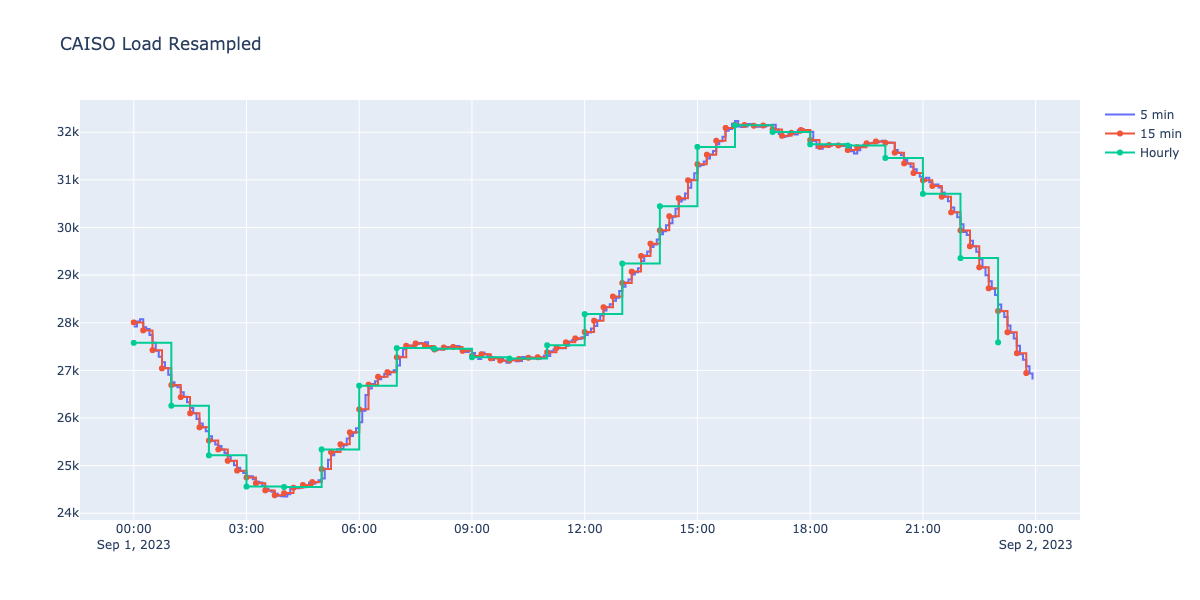

In [6]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_5min["interval_start_local"],
        y=df_5min["load"],
        name="5 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_15min["interval_start_local"],
        y=df_15min["load"],
        name="15 min",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.update_layout(title="CAISO Load Resampled")

fig.show("png", width=1200, height=600)

## Change the resampling function

By default, values within each resampling window are aggregated mean "mean". This can be changed with the `resample_function`. Possible values are "mean", "sum", "min", "max", "stddev", "count", "variance". If resample is None, this is ignored.

Below, we also query for the min and max of the load in each 1 hour window and then plot

In [7]:
df_hourly_min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="min",
    tz="US/Pacific",
)

df_hourly_max = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="max",
    tz="US/Pacific",
)

Fetching Page 1...Done in 0.43 seconds. 

Total number of rows: 24
Fetching Page 1...Done in 0.33 seconds. 

Total number of rows: 24


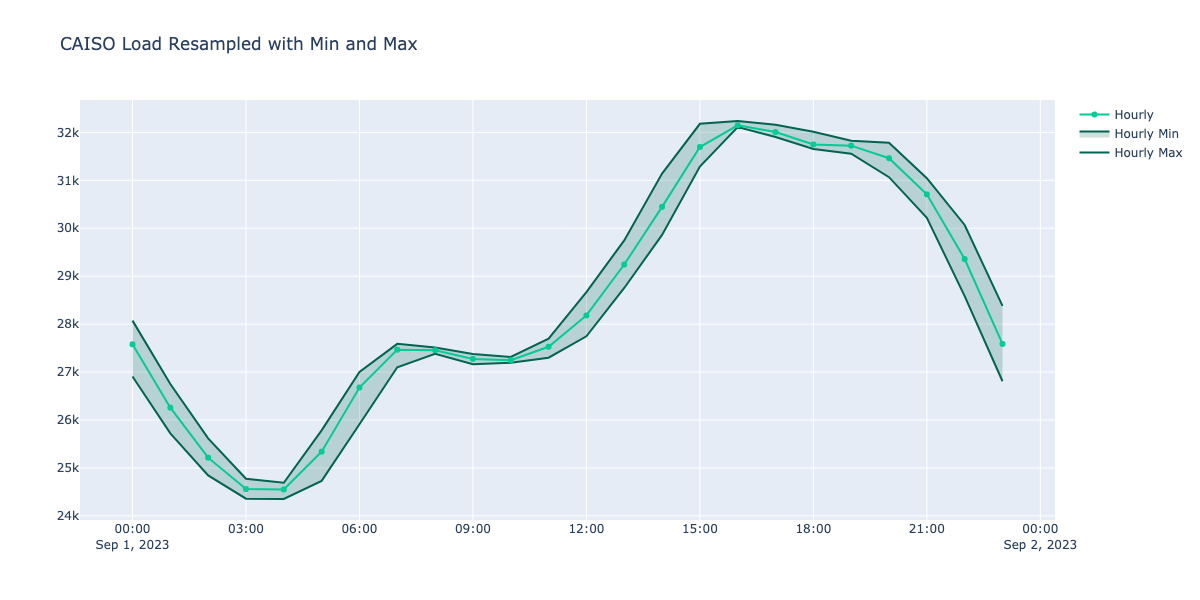

In [8]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_hourly_max["interval_start_local"],
        y=df_hourly_max["load"],
        name="Hourly Max",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly_min["interval_start_local"],
        y=df_hourly_min["load"],
        name="Hourly Min",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
        fill="tonexty",
        fillcolor="rgba(0,100,80,0.2)",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
    )
)

fig.update_layout(title="CAISO Load Resampled with Min and Max")

fig.show("png", width=1200, height=600)

## Specifying Columns to Resample
When dealing with multiple numeric columns, you can choose which ones to resample by using the columns parameter.

In [9]:
prc_df_raw = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    columns=["prc"],
    tz="US/Central",
)

prc_df_raw

Fetching Page 1...Done in 0.46 seconds. 

Total number of rows: 8010


,time_local,prc
0,2023-09-01 00:00:06-05:00,8417
1,2023-09-01 00:00:14-05:00,8577
2,2023-09-01 00:00:22-05:00,8577
3,2023-09-01 00:00:30-05:00,8598
4,2023-09-01 00:00:38-05:00,8619
...,...,...
8005,2023-09-01 23:59:14-05:00,9060
8006,2023-09-01 23:59:26-05:00,8920
8007,2023-09-01 23:59:34-05:00,8920
8008,2023-09-01 23:59:46-05:00,8899


to make it easier to work with, we can resample regular 1 minute intervals. when the data doesn't contain intervals, a `resample_frequency` column is added

In [10]:
prc_df_1min = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 minute",
    columns=["prc"],
    tz="US/Central",
)

prc_df_1min

Fetching Page 1...Done in 0.46 seconds. 

Total number of rows: 1440


,time_local,resample_frequency,prc
0,2023-09-01 00:00:00-05:00,1 MINUTE,8573.666667
1,2023-09-01 00:01:00-05:00,1 MINUTE,8693.333333
2,2023-09-01 00:02:00-05:00,1 MINUTE,8739.600000
3,2023-09-01 00:03:00-05:00,1 MINUTE,8771.000000
4,2023-09-01 00:04:00-05:00,1 MINUTE,8830.200000
...,...,...,...
1435,2023-09-01 23:55:00-05:00,1 MINUTE,9187.333333
1436,2023-09-01 23:56:00-05:00,1 MINUTE,9187.666667
1437,2023-09-01 23:57:00-05:00,1 MINUTE,9168.666667
1438,2023-09-01 23:58:00-05:00,1 MINUTE,9138.500000


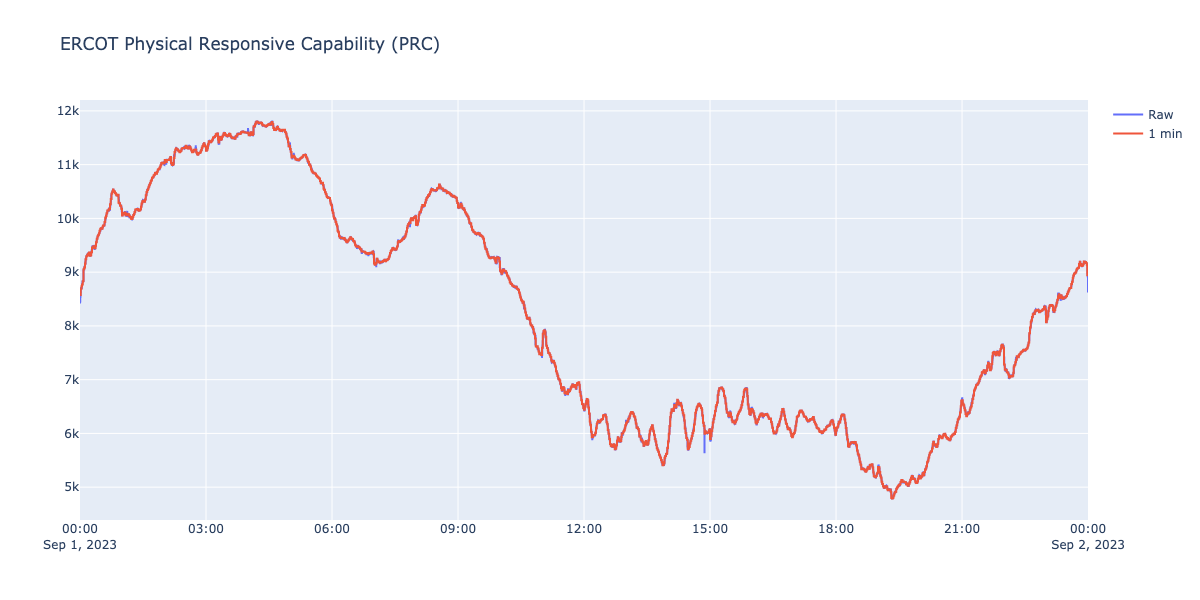

In [11]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=prc_df_raw["time_local"],
        y=prc_df_raw["prc"],
        name="Raw",
        mode="lines",
    )
)

fig.add_trace(
    go.Scatter(
        x=prc_df_1min["time_local"],
        y=prc_df_1min["prc"],
        name="1 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.update_layout(title="ERCOT Physical Responsive Capability (PRC)")

fig.show("png", width=1200, height=600)

## Specifying Columns to group by for Resampling in Multi-Series Datasets
In datasets with multiple time series, you may want to specify which columns to group by before resampling. For instance, in the EIA dataset that includes interchange data between balancing authorities, you can use the resample_by parameter to select specific columns.

Here's an example using the eia_ba_interchange_hourly dataset:

In [12]:
eia_daily_interchange = client.get_dataset(
    dataset="eia_ba_interchange_hourly",
    start="Sep 1, 2023",
    end="Oct 1, 2023",
    resample="1 day",
    resample_by=["interval_start_utc", "to_ba", "from_ba"],
    tz="US/Central",
)

eia_daily_interchange

Fetching Page 1...

Done in 0.5 seconds. 

Total number of rows: 5100


,interval_start_local,interval_end_local,to_ba,from_ba,mw
0,2023-08-31 19:00:00-05:00,2023-09-01 19:00:00-05:00,AECI,MISO,68.315789
1,2023-08-31 19:00:00-05:00,2023-09-01 19:00:00-05:00,AECI,SPA,80.473684
2,2023-08-31 19:00:00-05:00,2023-09-01 19:00:00-05:00,AECI,SWPP,331.052632
3,2023-08-31 19:00:00-05:00,2023-09-01 19:00:00-05:00,AECI,TVA,-150.105263
4,2023-08-31 19:00:00-05:00,2023-09-01 19:00:00-05:00,AESO,NWMT,78.736842
...,...,...,...,...,...
5095,2023-09-14 19:00:00-05:00,2023-09-15 19:00:00-05:00,WAUW,SWPP,76.600000
5096,2023-09-14 19:00:00-05:00,2023-09-15 19:00:00-05:00,WAUW,WACM,0.000000
5097,2023-09-14 19:00:00-05:00,2023-09-15 19:00:00-05:00,WWA,NWMT,-1.333333
5098,2023-09-14 19:00:00-05:00,2023-09-15 19:00:00-05:00,YAD,CPLE,-8.750000
